## Récupération des données

In [1]:
import matplotlib.pyplot as plt3
import numpy as np 
import pandas as pd
import seaborn as sns 
pd.set_option("display.max_columns",500)
import missingno as msno
from datetime import datetime
import time
import datetime
import statistics
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *

In [2]:
customers = pd.read_csv('olist_customers.csv')
orders = pd.read_csv('olist_orders.csv')
ordersitems= pd.read_csv('olist_order_items.csv')
geolocation=pd.read_csv('olist_geolocation.csv')
orderpayments=pd.read_csv('olist_order_payments.csv')
products=pd.read_csv('olist_products.csv')
orderreviews=pd.read_csv('olist_order_reviews.csv')
sellers=pd.read_csv('olist_sellers.csv')
productcategory=pd.read_csv('product_category_name_translation.csv')

#### Colonnes pour chaque dataset

In [3]:
print('customers',customers.columns)
print('orders',orders.columns)
print('ordersitems',ordersitems.columns)
print('geolocation',geolocation.columns)
print('orderpayments',orderpayments.columns)
print('products',products.columns)
print('orderreviews',orderreviews.columns)
print('sellers',sellers.columns)
print('productcategory',productcategory.columns)

customers Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
orders Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
ordersitems Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
geolocation Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
orderpayments Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
products Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',


#### Merge des dataset(s)

In [5]:
data=pd.merge(customers,orders,on='customer_id',how='outer')
data=pd.merge(data,ordersitems,on='order_id',how='outer')
data=pd.merge(data,orderpayments,on='order_id',how='outer')
data=pd.merge(data,orderreviews,on='order_id',how='outer')
data=pd.merge(data,sellers,on='seller_id',how='outer')
data=pd.merge(data,products,on='product_id',how='outer')
data=pd.merge(data,productcategory,on='product_category_name',how='outer')
#renaomage de la colonne eller_zip_code_prefix pour merger data avec geolocation
# data.rename(columns={'seller_zip_code_prefix':'geolocation_zip_code_prefix'},inplace=True)
#data=pd.merge(data,geolocation,on='geolocation_zip_code_prefix',how='outer')

In [6]:
data.shape

(119151, 40)

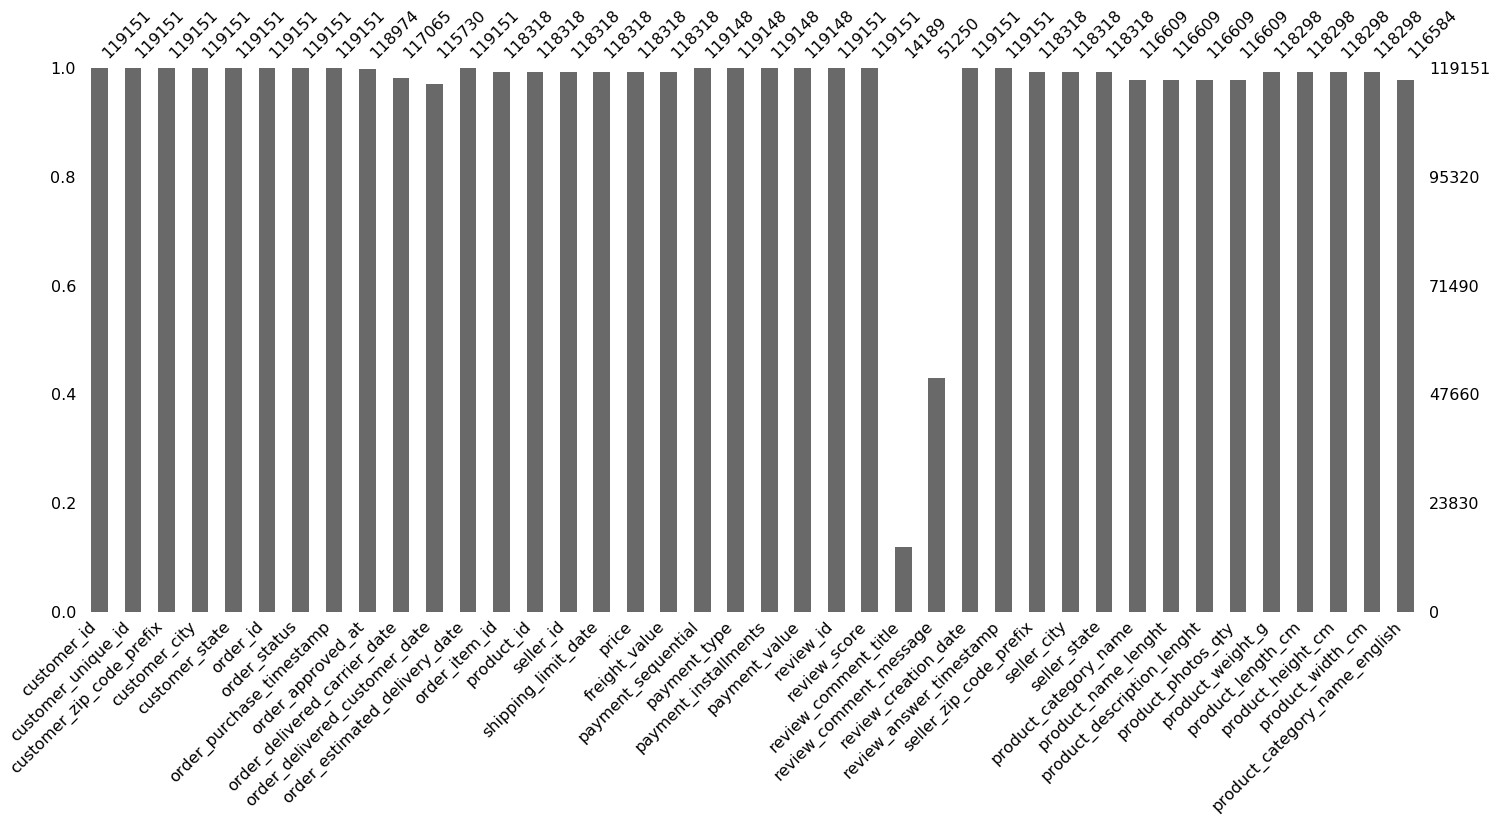

In [7]:
msno.bar(data)

In [8]:
data.drop(columns=['review_comment_title','review_comment_message'],inplace=True)

In [9]:
data.dropna(inplace=True)

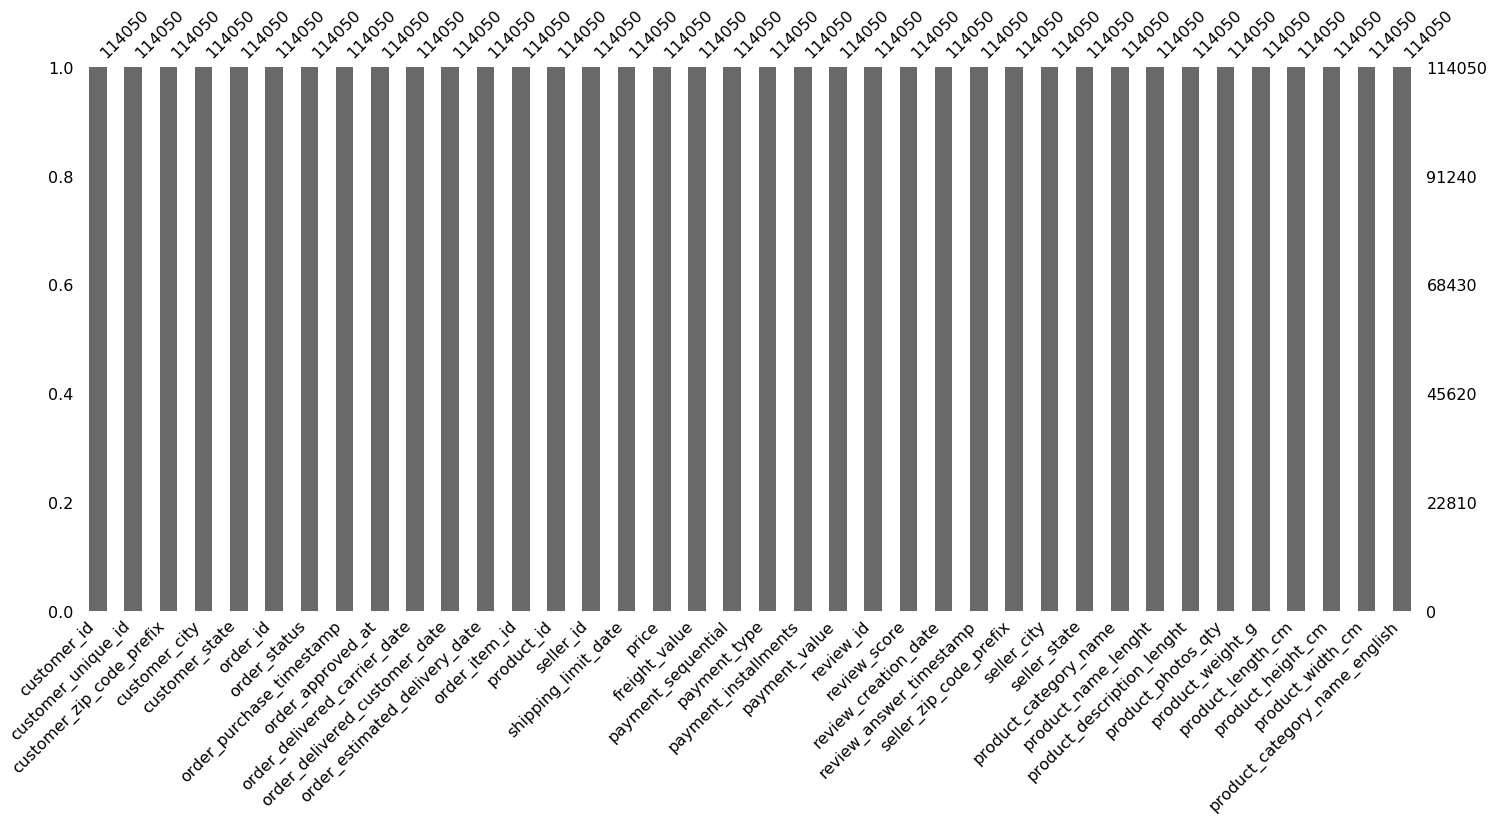

In [10]:
msno.bar(data)

#### nombre  doublons: customer_unique_id,order_id

In [11]:
data.duplicated(subset=['customer_unique_id']).sum()

21988

In [12]:
data.duplicated(subset=['customer_unique_id','order_id']).sum()

18941

In [13]:
data.duplicated(subset=['order_id']).sum()

18941

In [14]:
#data.drop_duplicates(subset=['customer_unique_id'],inplace=True)
data.drop_duplicates(subset=['order_id'],inplace=True)

In [15]:
data.shape

(95109, 38)

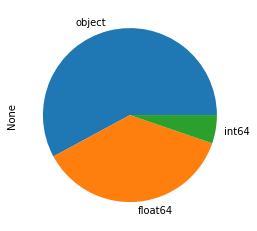

In [16]:
data.dtypes.value_counts().plot.pie()

### Creation features 

####  depense totale 

In [17]:
datad=data.groupby(['customer_unique_id'])['payment_value'].sum().to_frame('depense-totale-client')
datad=datad.reset_index()
datad

customer_unique_id  depense-totale-client
0      0000366f3b9a7992bf8c76cfdf3221e2                 141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f                  27.19
2      0000f46a3911fa3c0805444483337064                  86.22
3      0000f6ccb0745a6a4b88665a16c9f078                  43.62
4      0004aac84e0df4da2b147fca70cf8255                 196.89
...                                 ...                    ...
92057  fffcf5a5ff07b0908bd4e2dbc735a684                2067.42
92058  fffea47cd6d3cc0a88bd621562a9d061                  84.58
92059  ffff371b4d645b6ecea244b27531430a                 112.46
92060  ffff5962728ec6157033ef9805bacc48                 133.69
92061  ffffd2657e2aad2907e67c3e9daecbeb                  71.56

[92062 rows x 2 columns]

#### Depense moyenne

In [18]:
datadm=data.groupby(['customer_unique_id'])['payment_value'].mean().to_frame('depense-moyenne-client')
datadm=datadm.reset_index()
datadm

customer_unique_id  depense-moyenne-client
0      0000366f3b9a7992bf8c76cfdf3221e2                  141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f                   27.19
2      0000f46a3911fa3c0805444483337064                   86.22
3      0000f6ccb0745a6a4b88665a16c9f078                   43.62
4      0004aac84e0df4da2b147fca70cf8255                  196.89
...                                 ...                     ...
92057  fffcf5a5ff07b0908bd4e2dbc735a684                 2067.42
92058  fffea47cd6d3cc0a88bd621562a9d061                   84.58
92059  ffff371b4d645b6ecea244b27531430a                  112.46
92060  ffff5962728ec6157033ef9805bacc48                  133.69
92061  ffffd2657e2aad2907e67c3e9daecbeb                   71.56

[92062 rows x 2 columns]

#### nombre de commande

In [19]:
datac=data.groupby(['customer_unique_id'])['order_id'].count().to_frame('nombre-commandes-client')
datac=datac.reset_index()
datac.sample(10)

customer_unique_id  nombre-commandes-client
86669  f0dc35f1b6b60a5a4718b2420b92333d                        1
27069  4b2d8d001d20bd41b9d1017ede2e1d14                        1
24352  43a1e77261b73a1f6f821295cc66e26e                        1
35785  6335819f80007651a5c875cda8f173d9                        1
24847  44f0ee6c3bf46e4ea20aeccfef9b5e6d                        1
49988  8b0bdb01faf4513bac3e56c26065fbfb                        1
84743  eb4c7dfbd6f9453d65d48b21efcdfcf7                        1
62156  ac95e1a03943d13b3a18952c4dcb3166                        1
75409  d15efa6fcfd5909767d5c9de1608af29                        1
41618  7376203770e159da3909dd6adaa9b4bf                        1

In [20]:
datac['nombre-commandes-client'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 14], dtype=int64)

#### Type de paiement

In [21]:
data['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [22]:
data_credit_card=data.groupby('customer_unique_id')['payment_type'].apply(lambda x:(x=="credit_card").sum()).to_frame('payement_credit_card')
data_credit_card=data_credit_card.reset_index()
data_credit_card.sample(4)

customer_unique_id  payement_credit_card
54153  96977812f790d5dee60611658aa71ff8                     0
49141  889609c6f8182b1814483044b58bb0b7                     0
41032  71d482c2b03b9f2bf48f8ffbc5be7f7c                     0
66163  b7bf41e97e42aae7517baf9c28887010                     1

In [23]:
data_boleto=data.groupby('customer_unique_id')['payment_type'].apply(lambda x:(x=="boleto").sum()).to_frame('payement_boleto')
data_boleto=data_boleto.reset_index()
data_boleto.sample(4)

customer_unique_id  payement_boleto
83849  e8d4edef117c8915ae15d8fb4bd24f41                0
77205  d636819974225176f4e4983badc49539                1
71568  c6c982f3a7d21bff300d662d034d9b9c                0
43055  77928b4dbc08e06f382cf49eb6bdba88                0

In [24]:
data_voucher=data.groupby('customer_unique_id')['payment_type'].apply(lambda x:(x=="boleto").sum()).to_frame('payement_voucher')
data_voucher=data_voucher.reset_index()
data_voucher.sample(4)

customer_unique_id  payement_voucher
7118   13a08d206d7e3f777d1454cee48ded4e                 0
62949  aebc019034895515ebfcdd8fe7fa766f                 0
56717  9d8a5cdca7bacfcff45ae4e120923b20                 0
86179  ef643d635cab1ffb3111e14641861d72                 0

In [25]:
data_debit_card=data.groupby('customer_unique_id')['payment_type'].apply(lambda x:(x=="credit_card").sum()).to_frame('payement_debit_card')
data_debit_card=data_debit_card.reset_index()
data_debit_card.sample(4)

customer_unique_id  payement_debit_card
79954  ddecc2a6b8a440a500eb8fbcf933e0e7                    1
11489  1fb5645611bf27d5e69925e1d4f5b6cf                    1
57128  9eace4aaefb287121cb1279571a3cbbf                    1
56686  9d776cc4281d18b0934823fe051cf93b                    0

#### Frais de port moyen

In [26]:
data_Frais_port_moyen=data.groupby(['customer_unique_id'])['freight_value'].mean().to_frame('Frais_port_moyen')
data_Frais_port_moyen=data_Frais_port_moyen.reset_index()
data_Frais_port_moyen

customer_unique_id  Frais_port_moyen
0      0000366f3b9a7992bf8c76cfdf3221e2             12.00
1      0000b849f77a49e4a4ce2b2a4ca5be3f              8.29
2      0000f46a3911fa3c0805444483337064             17.22
3      0000f6ccb0745a6a4b88665a16c9f078             17.63
4      0004aac84e0df4da2b147fca70cf8255             16.89
...                                 ...               ...
92057  fffcf5a5ff07b0908bd4e2dbc735a684            239.14
92058  fffea47cd6d3cc0a88bd621562a9d061             19.69
92059  ffff371b4d645b6ecea244b27531430a             22.56
92060  ffff5962728ec6157033ef9805bacc48             18.69
92061  ffffd2657e2aad2907e67c3e9daecbeb             14.57

[92062 rows x 2 columns]

#### Frais de port max

In [27]:
data_Frais_port_max=data.groupby(['customer_unique_id'])['freight_value'].max().to_frame('Frais_port_max')
data_Frais_port_max=data_Frais_port_max.reset_index()
data_Frais_port_max

customer_unique_id  Frais_port_max
0      0000366f3b9a7992bf8c76cfdf3221e2           12.00
1      0000b849f77a49e4a4ce2b2a4ca5be3f            8.29
2      0000f46a3911fa3c0805444483337064           17.22
3      0000f6ccb0745a6a4b88665a16c9f078           17.63
4      0004aac84e0df4da2b147fca70cf8255           16.89
...                                 ...             ...
92057  fffcf5a5ff07b0908bd4e2dbc735a684          239.14
92058  fffea47cd6d3cc0a88bd621562a9d061           19.69
92059  ffff371b4d645b6ecea244b27531430a           22.56
92060  ffff5962728ec6157033ef9805bacc48           18.69
92061  ffffd2657e2aad2907e67c3e9daecbeb           14.57

[92062 rows x 2 columns]

In [28]:
# convertir les dates  en objet datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format="%Y-%m-%d %H:%M:%S")
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'], format="%Y-%m-%d %H:%M:%S")
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'], format="%Y-%m-%d %H:%M:%S")
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'], format="%Y-%m-%d %H:%M:%S")
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'], format="%Y-%m-%d %H:%M:%S")
data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date'], format="%Y-%m-%d %H:%M:%S")
data['review_creation_date'] = pd.to_datetime(data['review_creation_date'], format="%Y-%m-%d %H:%M:%S")
data['review_answer_timestamp'] = pd.to_datetime(data['review_answer_timestamp'], format="%Y-%m-%d %H:%M:%S")

In [29]:
data.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    

#### temps de livraison

In [30]:
data['temps_livraison']=(data['order_delivered_customer_date']-data['order_purchase_timestamp'])

In [31]:
data['temps_livraison']=data['temps_livraison'].astype(str).str[:2]

#### Nombre d'achat en semaine

In [32]:
data['semaine_order']=data['order_purchase_timestamp'].astype(str).apply(lambda d: time.strftime('%W',time.strptime(d,'%Y-%m-%d %H:%M:%S')))
data_nombre_achat_semaine=data.groupby(['customer_unique_id'])['semaine_order'].count().to_frame('nombre_achat_semaine')
data_nombre_achat_semaine=data_nombre_achat_semaine.reset_index()
data_nombre_achat_semaine

customer_unique_id  nombre_achat_semaine
0      0000366f3b9a7992bf8c76cfdf3221e2                     1
1      0000b849f77a49e4a4ce2b2a4ca5be3f                     1
2      0000f46a3911fa3c0805444483337064                     1
3      0000f6ccb0745a6a4b88665a16c9f078                     1
4      0004aac84e0df4da2b147fca70cf8255                     1
...                                 ...                   ...
92057  fffcf5a5ff07b0908bd4e2dbc735a684                     1
92058  fffea47cd6d3cc0a88bd621562a9d061                     1
92059  ffff371b4d645b6ecea244b27531430a                     1
92060  ffff5962728ec6157033ef9805bacc48                     1
92061  ffffd2657e2aad2907e67c3e9daecbeb                     1

[92062 rows x 2 columns]

#### Nombre d'achat le weekend

In [33]:
from datetime import datetime
data['wekend_order']=data['order_purchase_timestamp'].astype(str).apply(lambda d:datetime.strptime(d,'%Y-%m-%d %H:%M:%S').isoweekday())
data.loc[data.wekend_order==7,'wekend_order']=6
data_nombre_achat_wekend=data.groupby('customer_unique_id')['wekend_order'].apply(lambda x:(x==6).sum()).to_frame('nombre_achat_wekend')
data_nombre_achat_wekend=data_nombre_achat_wekend.reset_index()
data_nombre_achat_wekend.sample(4)

customer_unique_id  nombre_achat_wekend
58552  a29a709c770157fc9e486f1c6f4a8c7d                    0
33084  5b99b037dd23d71e703eeb9a1f643cda                    0
20443  38a20b7e29a945b4904ad3b0fbedd593                    0
74177  ce0420746cd263caa2b0774dfd43717b                    0

In [34]:
data_nombre_achat_wekend['nombre_achat_wekend'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

#### Jour le plus fréquent d'achat

In [35]:
data['jour_achat']=data['order_purchase_timestamp'].astype(str).apply(lambda d:datetime.strptime(d,'%Y-%m-%d %H:%M:%S').isoweekday())
data_nombre_achat_jour=data.groupby('customer_unique_id')['jour_achat'].agg(pd.Series.mode).to_frame('nombre_achat_jour_freq')
data_nombre_achat_jour=data_nombre_achat_jour.reset_index()
data_nombre_achat_jour

customer_unique_id nombre_achat_jour_freq
0      0000366f3b9a7992bf8c76cfdf3221e2                      4
1      0000b849f77a49e4a4ce2b2a4ca5be3f                      1
2      0000f46a3911fa3c0805444483337064                      5
3      0000f6ccb0745a6a4b88665a16c9f078                      4
4      0004aac84e0df4da2b147fca70cf8255                      2
...                                 ...                    ...
92057  fffcf5a5ff07b0908bd4e2dbc735a684                      4
92058  fffea47cd6d3cc0a88bd621562a9d061                      7
92059  ffff371b4d645b6ecea244b27531430a                      2
92060  ffff5962728ec6157033ef9805bacc48                      3
92061  ffffd2657e2aad2907e67c3e9daecbeb                      2

[92062 rows x 2 columns]

#### Heure la plus fréquente d'achat

In [36]:
# mode 
data['heure_achat']=data['order_purchase_timestamp'].astype(str).str[11:13]
data_nombre_achat_heure=data.groupby('customer_unique_id')['heure_achat'].agg(pd.Series.mode).to_frame('nombre_achat_heure_freq')
data_nombre_achat_heure=data_nombre_achat_heure.reset_index()
data_nombre_achat_heure

customer_unique_id nombre_achat_heure_freq
0      0000366f3b9a7992bf8c76cfdf3221e2                      10
1      0000b849f77a49e4a4ce2b2a4ca5be3f                      11
2      0000f46a3911fa3c0805444483337064                      21
3      0000f6ccb0745a6a4b88665a16c9f078                      20
4      0004aac84e0df4da2b147fca70cf8255                      19
...                                 ...                     ...
92057  fffcf5a5ff07b0908bd4e2dbc735a684                      21
92058  fffea47cd6d3cc0a88bd621562a9d061                      20
92059  ffff371b4d645b6ecea244b27531430a                      15
92060  ffff5962728ec6157033ef9805bacc48                      15
92061  ffffd2657e2aad2907e67c3e9daecbeb                      20

[92062 rows x 2 columns]

#### Nombre de jours que le client reste sans faire de commande

In [37]:
date_now= pd.to_datetime(datetime.now(), format="%Y-%m-%d %H:%M:%S") 
data['nombre-jour-client-sans-commande']=datetime.now()-data['order_purchase_timestamp']
data['nombre-jour-client-sans-commande']=data['nombre-jour-client-sans-commande'].astype(str).str[:4]
data['nombre-jour-client-sans-commande']

0         1513
1         1337
3         1522
4         1250
5         1567
          ... 
119144    1446
119145    1502
119146    1194
119148    1410
119149    1437
Name: nombre-jour-client-sans-commande, Length: 95109, dtype: object

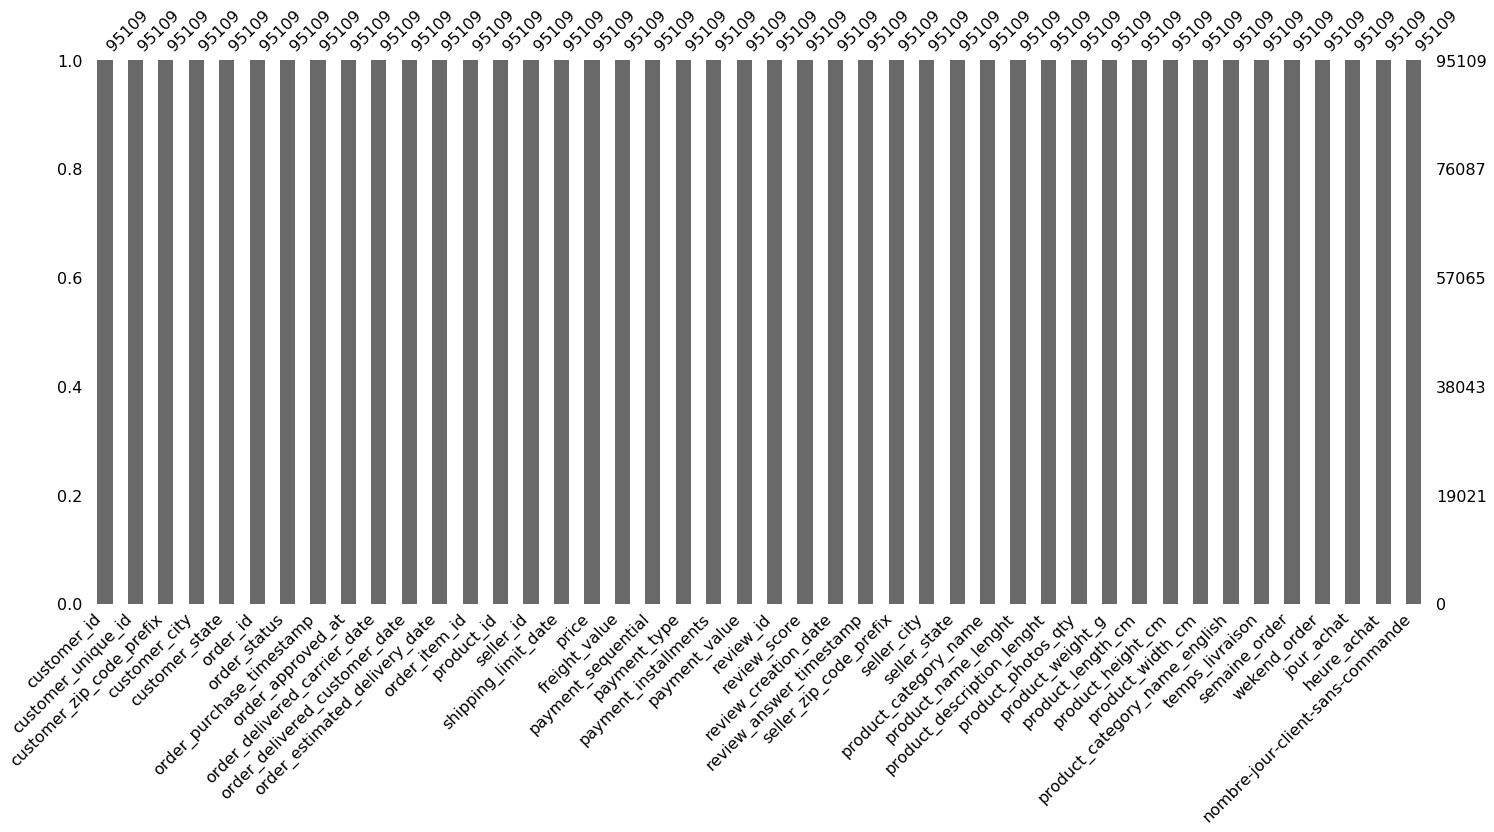

In [38]:
msno.bar(data)

### data final

In [39]:
data=pd.merge(data,datad,on='customer_unique_id',how='outer')
data=pd.merge(data,datadm,on='customer_unique_id',how='outer')
data=pd.merge(data,datac,on='customer_unique_id',how='outer')
data=pd.merge(data,data_credit_card,on='customer_unique_id',how='outer')
data=pd.merge(data,data_boleto,on='customer_unique_id',how='outer')
data=pd.merge(data,data_voucher,on='customer_unique_id',how='outer')
data=pd.merge(data,data_debit_card,on='customer_unique_id',how='outer')
data=pd.merge(data,data_Frais_port_moyen,on='customer_unique_id',how='outer')
data=pd.merge(data,data_Frais_port_max,on='customer_unique_id',how='outer')
data=pd.merge(data,data_nombre_achat_semaine,on='customer_unique_id',how='outer')
data=pd.merge(data,data_nombre_achat_wekend,on='customer_unique_id',how='outer')
data=pd.merge(data,data_nombre_achat_jour,on='customer_unique_id',how='outer')
data=pd.merge(data,data_nombre_achat_heure,on='customer_unique_id',how='outer')

In [40]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'temps_livraison', 'semaine_order',
       'wekend_order', 'jour_achat', 'heure_achat',
       'nombre-jour-cl

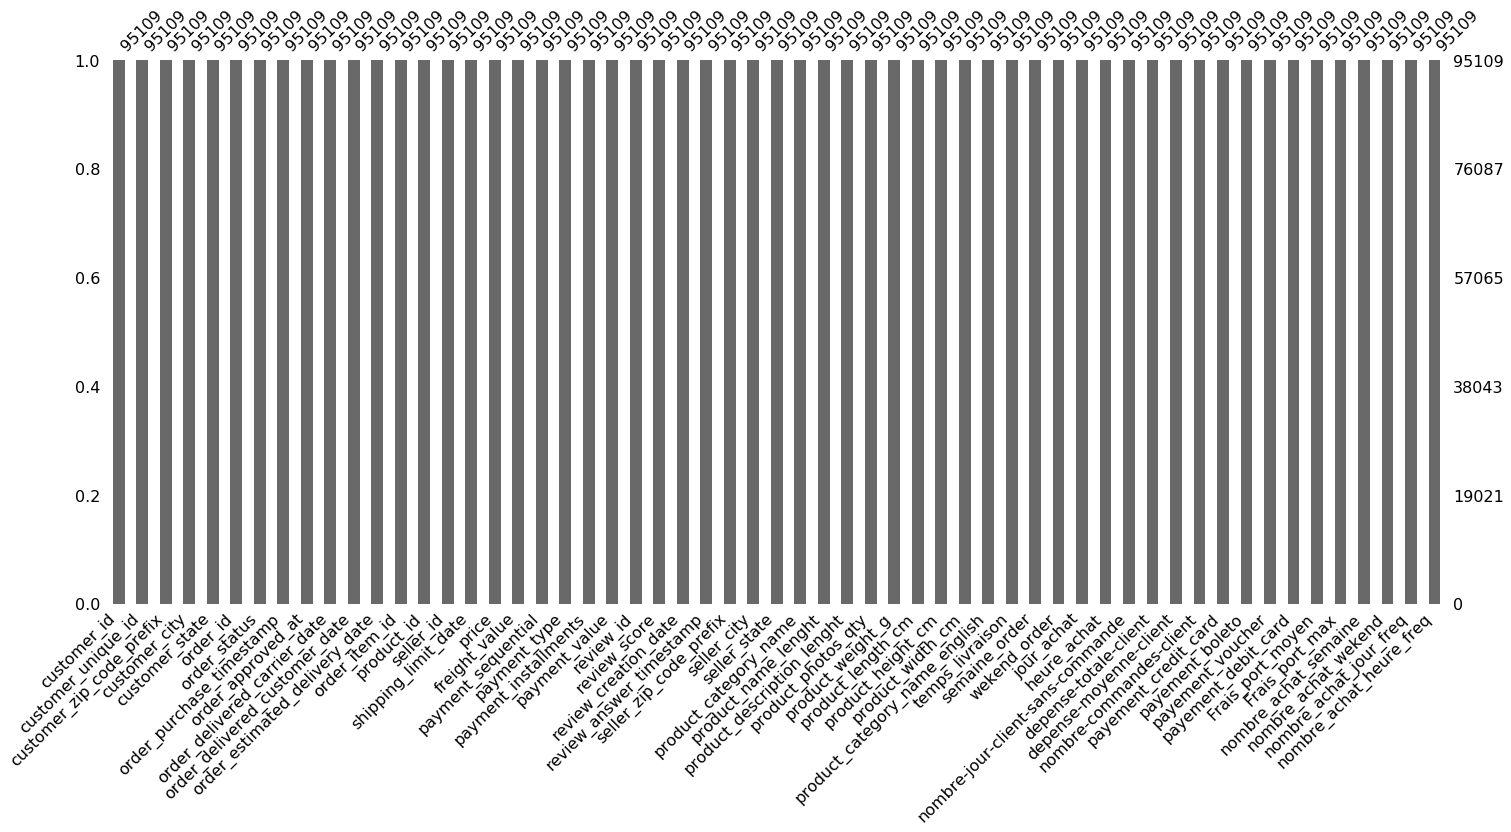

In [41]:
msno.bar(data,labels=True)

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

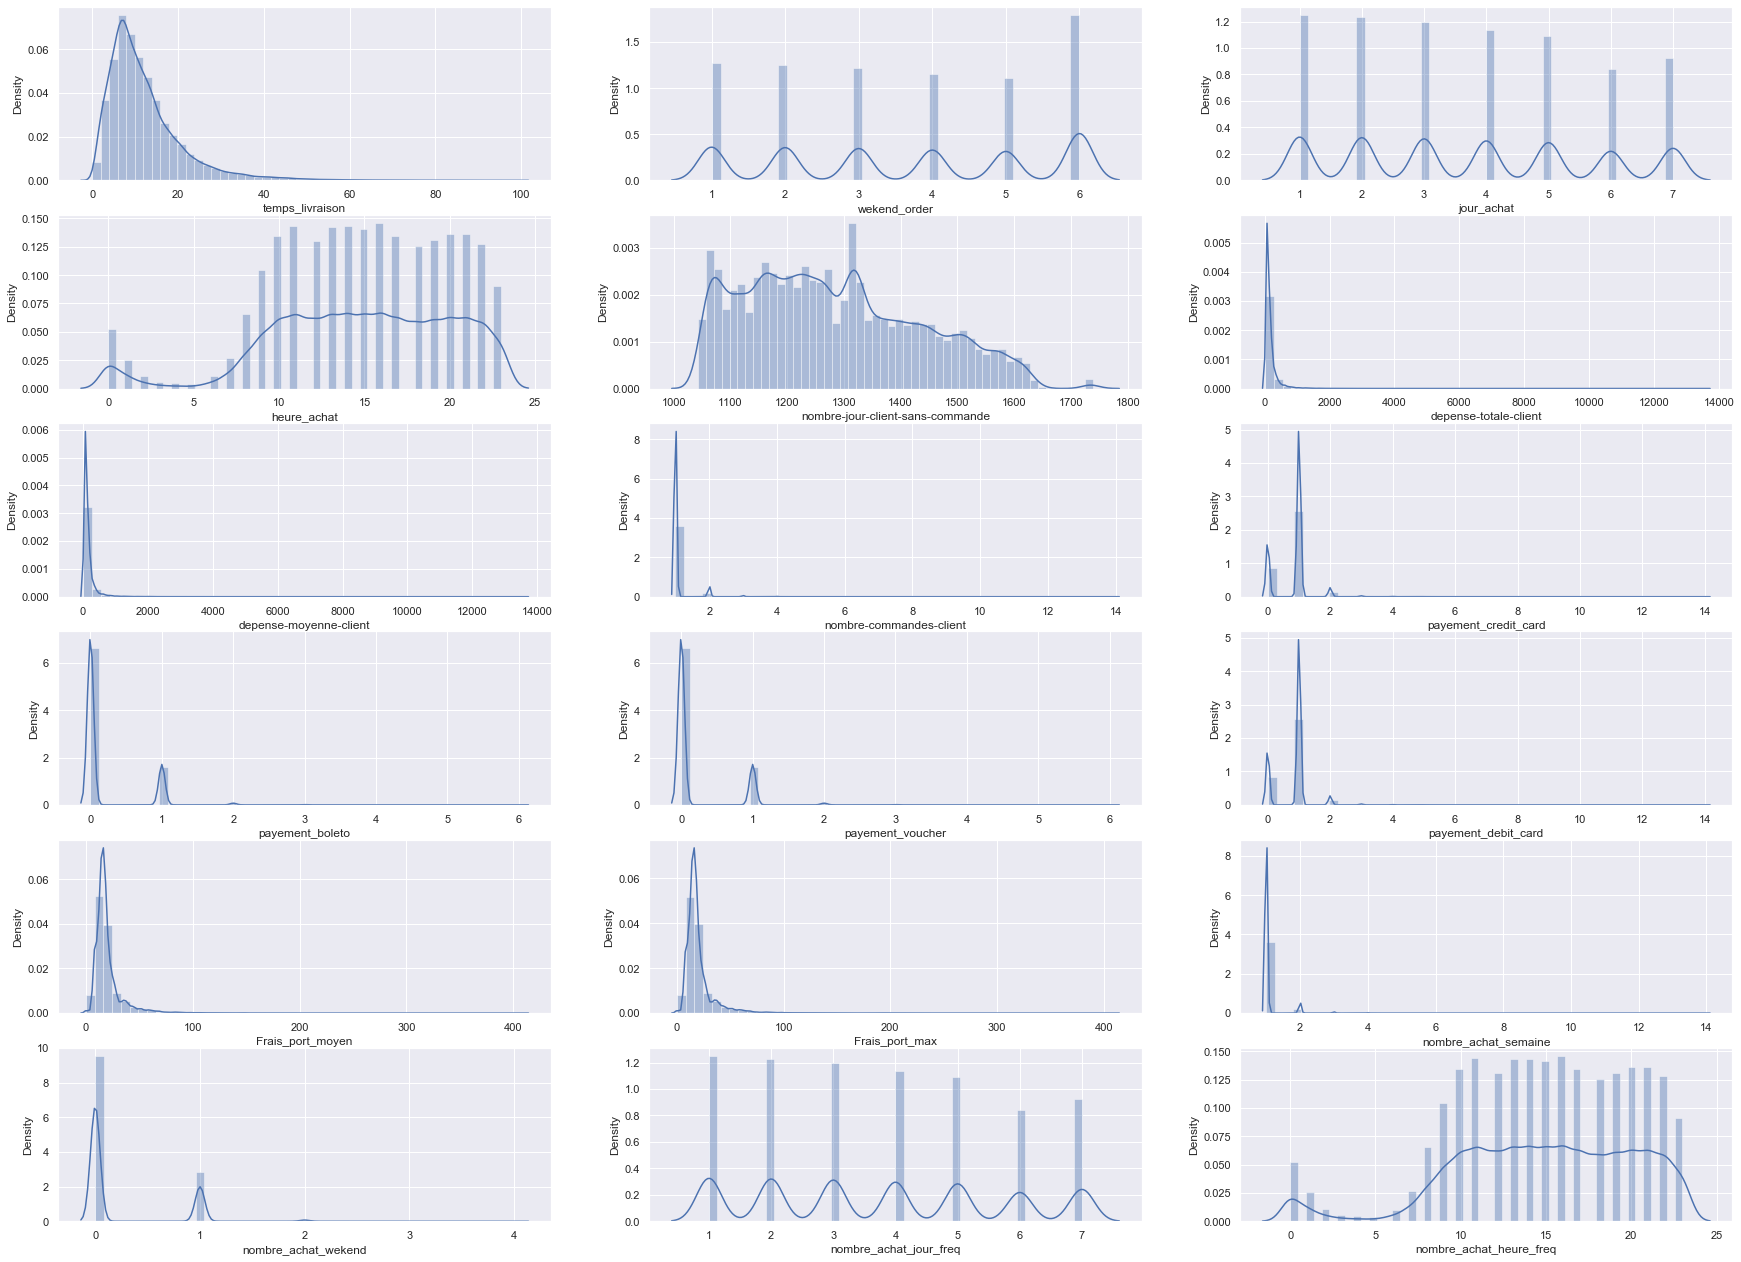

In [42]:
#Convertir les features creés  en numeric
data['nombre_achat_heure_freq']=pd.to_numeric(data['nombre_achat_heure_freq'],errors = 'coerce')
data["nombre_achat_jour_freq"]=pd.to_numeric(data["nombre_achat_jour_freq"],errors = 'coerce')
data["nombre-jour-client-sans-commande"]=pd.to_numeric(data["nombre-jour-client-sans-commande"],errors = 'coerce')
data["semaine_order"]=pd.to_numeric(data["semaine_order"],errors = 'coerce')
data["temps_livraison"]=pd.to_numeric(data["temps_livraison"],errors = 'coerce')

listes=['temps_livraison',
       'wekend_order', 'jour_achat', 'heure_achat',
       'nombre-jour-client-sans-commande',
       'depense-totale-client', 'depense-moyenne-client',
       'nombre-commandes-client', 'payement_credit_card', 'payement_boleto',
       'payement_voucher', 'payement_debit_card', 'Frais_port_moyen',
       'Frais_port_max', 'nombre_achat_semaine', 'nombre_achat_wekend',
       'nombre_achat_jour_freq', 'nombre_achat_heure_freq']

for i in range(18):
    sns.set(rc={"figure.figsize": (30, 30)})
    subplot(8,3,i+1)
    ax = sns.distplot(data[listes[i]])

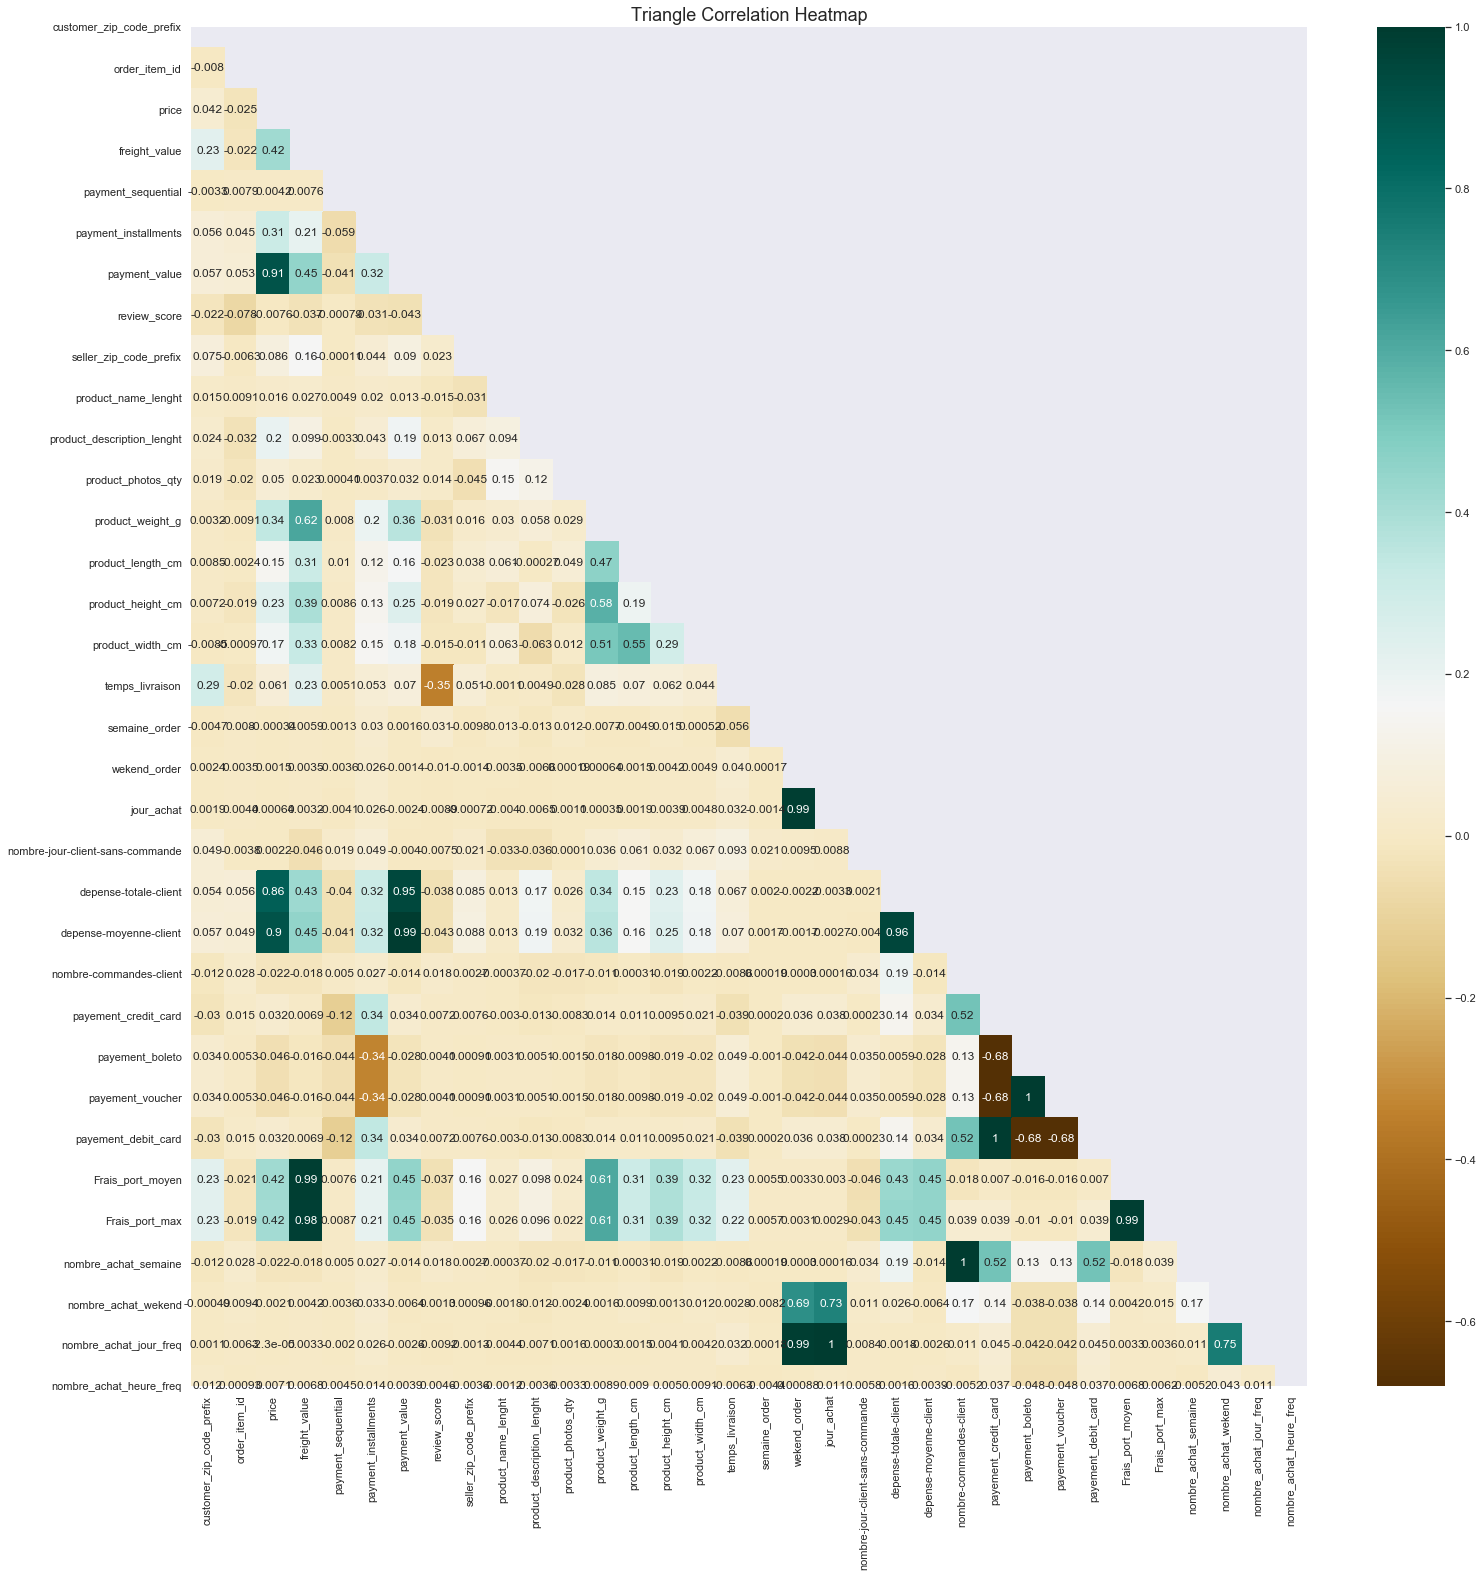

In [43]:
plt.figure(figsize=(25,25))
mask = np.triu(np.ones_like(data.corr()))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap',fontdict={'fontsize':18});

#### Exportation dataframe data en csv

In [44]:
data.to_csv(r'C:\Users\HP\Desktop\OpenClassroom\P5_Ezznati_Traiq\Mesnotesbook\data.csv',index=False)